In [2]:
# Project 1: Sales Forecasting with Lag & Rolling Features.
# The goal here is to engineer time-based features that help a model learn trends or patterns.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Random data set
# Generate 90 days of sales for 1 product
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=90)
sales = np.random.randint(80, 120, size=len(dates))

df = pd.DataFrame({
    'date': dates,
    'product_id': 'P001',
    'sales': sales
})

df.set_index('date', inplace=True)
df.head()


,product_id,sales
date,,
2024-01-01,P001,118
2024-01-02,P001,108
2024-01-03,P001,94
2024-01-04,P001,87
2024-01-05,P001,100


In [5]:
# lag_1: yesterday's sales
# lag_7: sales 7 days ago (weekly pattern)
# rolling_mean_3: 3-day moving average
# rolling_std_3: 3-day standard deviation

df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df['rolling_mean_3'] = df['sales'].rolling(window=3).mean()
df['rolling_std_7'] = df['sales'].rolling(window=7).std()
df.head(10)


,product_id,sales,lag_1,lag_7,rolling_mean_3,rolling_std_7
date,,,,,,
2024-01-01,P001,118,NaN,NaN,NaN,NaN
2024-01-02,P001,108,118.0,NaN,NaN,NaN
2024-01-03,P001,94,108.0,NaN,106.666667,NaN
2024-01-04,P001,87,94.0,NaN,96.333333,NaN
2024-01-05,P001,100,87.0,NaN,93.666667,NaN
2024-01-06,P001,118,100.0,NaN,101.666667,NaN
2024-01-07,P001,98,118.0,NaN,105.333333,11.870331
2024-01-08,P001,102,98.0,118.0,106.000000,9.949874
2024-01-09,P001,90,102.0,108.0,96.666667,10.162958


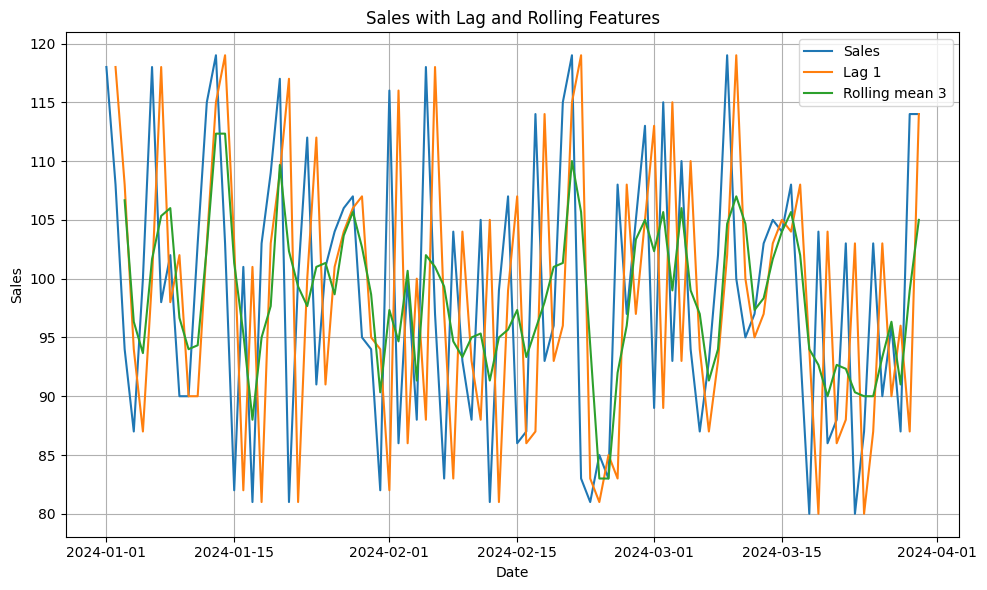

In [6]:
# plot the figures

plt.figure(figsize=(10,6))
plt.plot(df['sales'], label='Sales')
plt.plot(df['lag_1'], label='Lag 1')
plt.plot(df['rolling_mean_3'], label='Rolling mean 3')
plt.title("Sales with Lag and Rolling Features")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Cleaning
df.isnull().sum()
df_clean = df.dropna().copy()
df_clean.head(10)


,product_id,sales,lag_1,lag_7,rolling_mean_3,rolling_std_7
date,,,,,,
2024-01-08,P001,102,98.0,118.0,106.000000,9.949874
2024-01-09,P001,90,102.0,108.0,96.666667,10.162958
2024-01-10,P001,90,90.0,94.0,94.000000,10.558229
2024-01-11,P001,103,90.0,87.0,94.333333,9.494359
2024-01-12,P001,115,103.0,100.0,102.666667,11.025943
2024-01-13,P001,119,115.0,118.0,112.333333,11.267315
2024-01-14,P001,103,119.0,98.0,112.333333,11.096975
2024-01-15,P001,82,103.0,102.0,101.333333,13.707836
2024-01-16,P001,101,82.0,90.0,95.333333,12.941259


In [8]:
df_clean.columns

Index(['product_id', 'sales', 'lag_1', 'lag_7', 'rolling_mean_3',
       'rolling_std_7'],
      dtype='object')

In [9]:
# Part 2
# Sales Prediction with Random Forest
# You’ll use the engineered lag and rolling features to predict future sales using a RandomForestRegressor.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# define features and target
X = df_clean[['lag_1', 'lag_7', 'rolling_mean_3', 'rolling_std_7']]
y = df_clean['sales']

In [11]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 6.52
RMSE: 57.61


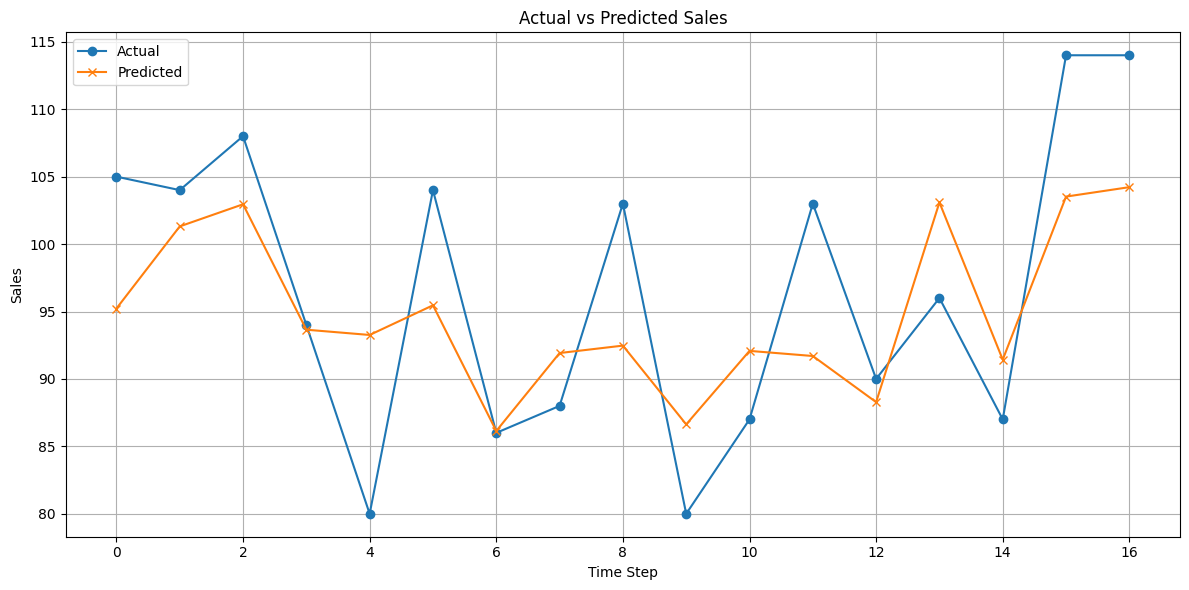

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


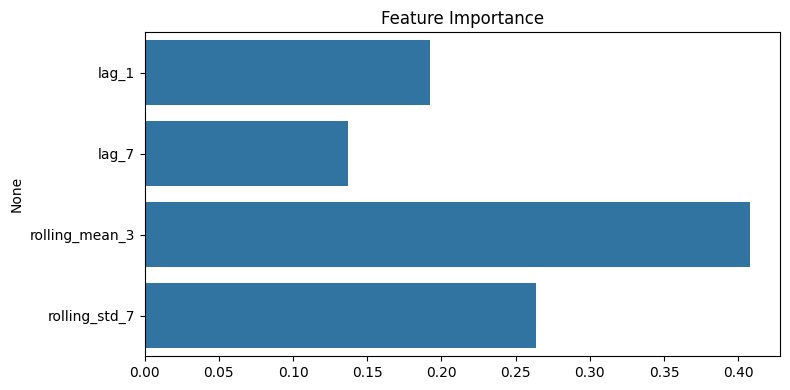

In [15]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
# TO BE REVIEWED


In [19]:
# Project 3 – Part 1: Partial Dependence Plots (PDP)
# This will help you understand how each feature affects the prediction, keeping other features constant.

# A Partial Dependence Plot shows the relationship between a feature and the predicted outcome 
# — averaged over the dataset — giving insight into feature influence.
from pdpbox import pdp

pdp_lag7 = pdp.pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X.columns, 
    feature='lag_7'
)

pdp.pdp_plot(pdp_lag7, 'lag_7')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [ ]:
pdp_roll = pdp.pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X.columns, 
    feature='rolling_mean_3'
)

pdp.pdp_plot(pdp_roll, 'rolling_mean_3')
plt.show()

NameError: name 'pdp' is not defined

In [ ]:
# lag_1, rolling_std_3

In [ ]:
# Part 2: SHAP (SHapley Additive Explanations)
# This will show how much each feature contributed to a single prediction, and 
# works especially well with tree models like RandomForestRegressor.

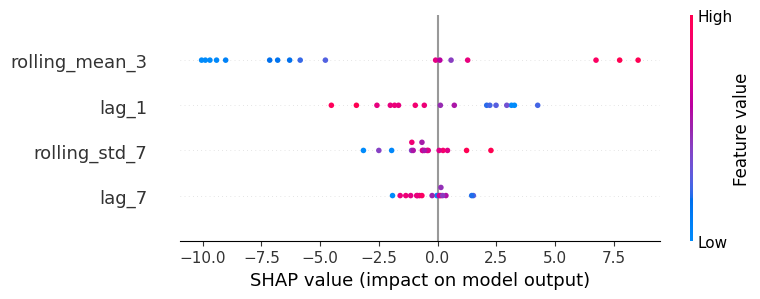

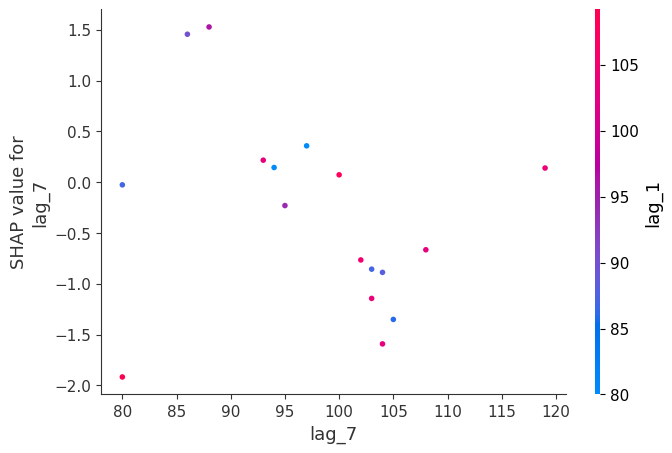

In [ ]:


import shap

# Initialize the explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Global Feature Importance
shap.summary_plot(shap_values, X_test)
#       This tells you which features generally have the most influence across the dataset.
#       Color indicates feature value (red = high, blue = low).
#       X-axis shows positive or negative contribution to prediction.

# Individual Prediction Explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
#       This creates a force plot: a visual explanation of how the model predicted the value for that row.
#       Red pushes prediction higher, blue lowers it.

shap.dependence_plot("lag_7", shap_values, X_test)
#       Like PDP, but also shows interaction effects with other features.


# Tool	                Insight
# summary_plot	        Which features matter most overall
# force_plot	        Why the model made this prediction
# dependence_plot	    Relationship between feature & prediction